In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [5]:
df = pd.read_csv('c:/data/Data/ozone/ozone2.csv')

df.head()

,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,67,0
1,118.000000,8.0,72,72,0
2,149.000000,12.6,74,74,0
3,313.000000,11.5,62,62,0
4,185.931507,14.3,56,56,0


In [6]:
df.columns

Index(['Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [7]:
df.shape

(153, 5)

In [8]:
df.describe()

,Solar.R,Wind,Temp,Ozone,Result
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,185.931507,9.957516,77.882353,77.882353,0.555556
std,87.960267,3.523001,9.465270,9.465270,0.498536
min,7.000000,1.700000,56.000000,56.000000,0.000000
25%,120.000000,7.400000,72.000000,72.000000,0.000000
50%,194.000000,9.700000,79.000000,79.000000,1.000000
75%,256.000000,11.500000,85.000000,85.000000,1.000000
max,334.000000,20.700000,97.000000,97.000000,1.000000


In [10]:
df.groupby('Result').mean()

,Solar.R,Wind,Temp,Ozone
Result,,,,
0,180.467566,11.082353,71.367647,71.367647
1,190.302659,9.057647,83.094118,83.094118


Text(0, 0.5, '빈도')

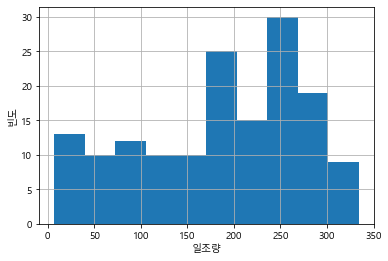

In [12]:
%matplotlib inline

df['Solar.R'].hist()
plt.xlabel('일조량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

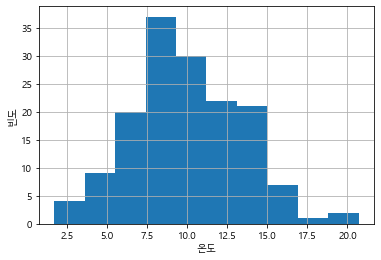

In [13]:
%matplotlib inline

df['Wind'].hist()
plt.xlabel('온도')
plt.ylabel('빈도')

In [14]:
df['Result'].value_counts()

1    85
0    68
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족 || 1: 정상)')

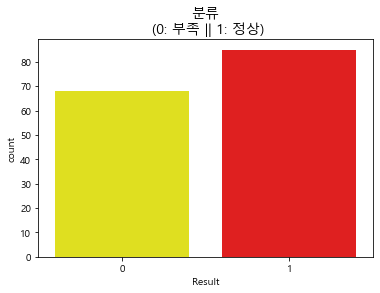

In [15]:
import seaborn as sns

colors = ['yellow', 'red']

sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)

In [18]:
from imblearn.under_sampling import RandomUnderSampler

cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

#fit_sample
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [20]:
#오버샘플링
from imblearn.over_sampling import SMOTE

cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df2 = pd.concat([X_samp,y_samp], axis=1)

In [21]:
df2["Result"].value_counts()

0    85
1    85
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족 || 1: 정상)')

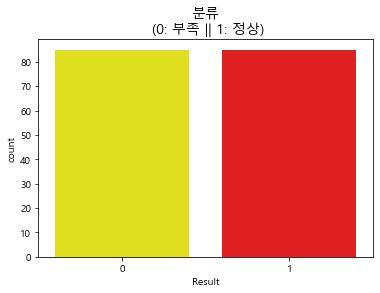

In [22]:
import seaborn as sns

colors=['yellow', 'red']

sns.countplot('Result', data=df2, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)

In [23]:
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [24]:
import statsmodels.api as sm
model = sm.Logit(y,X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.589271
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.150     
Dependent Variable: Result           AIC:              206.3520  
Date:               2021-12-07 16:05 BIC:              215.7594  
No. Observations:   170              Log-Likelihood:   -100.18   
Df Model:           2                LL-Null:          -117.84   
Df Residuals:       167              LLR p-value:      2.1418e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R   -0.0013     0.0020   -0.6280   0.5300   -0.0053    0.0027
Wind      -0.2427     0.0481   -5.0493   0.0000   -0.3369   -0.1485
Temp       0.0359     0.0080    4.4708   0.0000    0.0202    0.0516
=================================================================

"""

In [25]:
cols = ['Wind', 'Temp']

X=X_samp[cols]
y=y_samp['Result']
df2 = pd.concat([X,y], axis=1)

In [27]:
import statsmodels.api as sm
model = sm.Logit(y,X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.590434
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.148     
Dependent Variable: Result           AIC:              204.7477  
Date:               2021-12-07 16:07 BIC:              211.0193  
No. Observations:   170              Log-Likelihood:   -100.37   
Df Model:           1                LL-Null:          -117.84   
Df Residuals:       168              LLR p-value:      3.4312e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.2438     0.0481   -5.0659   0.0000   -0.3382   -0.1495
Temp       0.0330     0.0065    5.0624   0.0000    0.0202    0.0458
=================================================================

"""

In [ ]:
from sklearn